# Prática 01: Geração de sinais e sistemas

## Parte 1: Geração e manipulação de 
* Preparação do ambiente

In [247]:
import numpy as np
import matplotlib.pyplot as plt

### Questão 01:
Considere o seguinte sinal: x[n] = 0,7n, para 0 ≤ n ≤ 10, e x[n] = 0, caso contrário. 
Desenhe o gráfico deste sinal para -10 ≤ n ≤ 15 


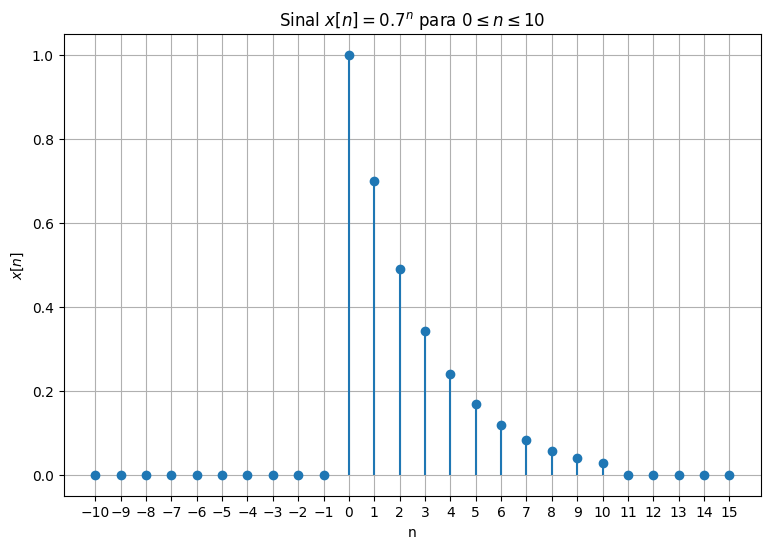

In [ ]:
#Definindo o tamanho de n (10<= n <= 15)
n_samples = np.arange(-10,16)

#função da questão
def x(n:int)->float:
    if(0<= n and n <= 10):
        return(0.7 ** n)
    else:
        return 0

x_n = [x(n) for n in n_samples]

plt.figure(figsize=(9,6))
plt.stem(n_samples, x_n, basefmt=" ")

#Estilização
plt.title("Sinal $x[n] = 0.7^n$ para $0 \\leq n \\leq 10$")
plt.xlabel("n")
plt.ylabel("$x[n]$")
plt.xticks(n_samples)

plt.grid(True)
plt.show()

### Questão 2:
Gere o gráfico do sinal w[n] = x[n-5]. Desenhe este gráfico na mesma figura da questão 
1, mas usando outra cor [hold on, plot].

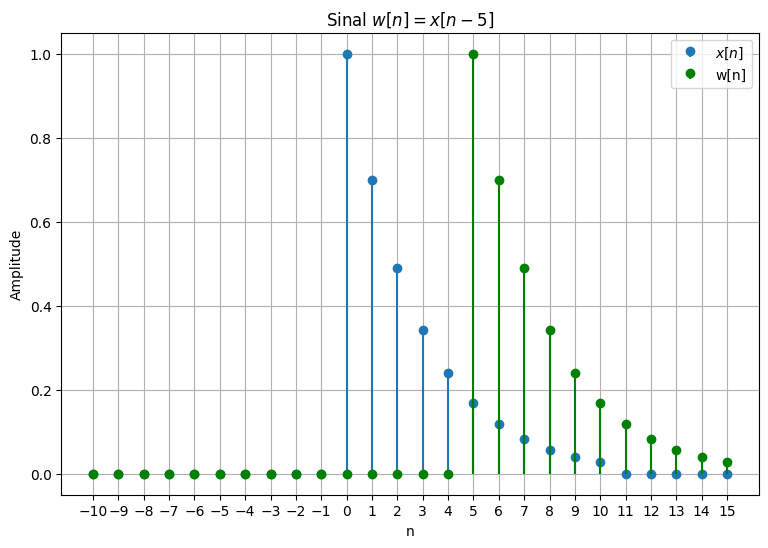

In [249]:
#função da questão
def w(n:int):
    return  x(n-5)

w_n = [w(n) for n in n_samples]

#Defininindo os gráficos
plt.figure(figsize=(9,6))
plt.stem(n_samples, x_n, basefmt= " ", label="$ x[n]$")
plt.stem(n_samples, w_n, linefmt="g-", markerfmt="go", basefmt=" ", label="w[n]")

#Estilização
plt.title("Sinal $w[n] = x[n-5]$")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(n_samples)

plt.grid(True)
plt.legend()

plt.show()


### Questão 3:
Gere o gráfico do sinal w[n] = x[-n+3]. Desenhe este gráfico na mesma figura das 
questões 1 e 2, mas usando outra cor [hold on, plot].

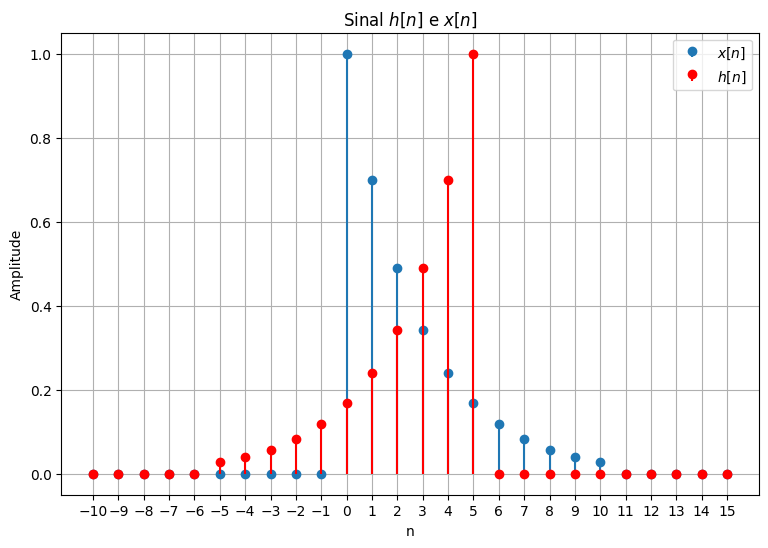

In [250]:
#função da questão 3
def h(n:int):
    return x(-n+5)

h_n = [h(n) for n in n_samples]

plt.figure(figsize=(9,6))
plt.stem(n_samples, x_n, label="$x[n]$", basefmt=" ")
plt.stem(n_samples, h_n, linefmt='r-', markerfmt='ro', label="$h[n]$", basefmt=" ")

#Estilização
plt.title("Sinal $h[n]$ e $x[n]$")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.xticks(n_samples)

plt.grid(True)
plt.legend()

plt.show()

## Parte 2: Filtro média móvel
### Questão 4:
Gere um seno com amplitude igual a 1, frequência 0,1.π, fase inicial nula [sin]. Em 
seguida, acrescente a este seno um ruído branco com desvio-padrão igual a 0,2, da 
seguinte forma: x = sin(0,1.π.n) + randn(N,1)*0.2, em que N é tamanho do sinal. Desenhe o 
gráfico deste seno ruidoso para N=50 (1 ≤ n ≤ 50). Colocar este gráfico em uma figura 
separa dos gráficos das questões 1, 2 e 3 [sin, randn, figure, plot].

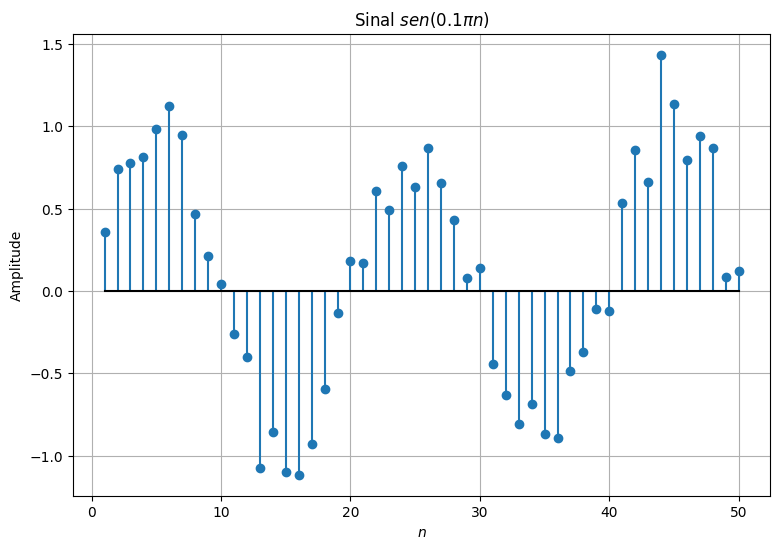

In [251]:
#Função da questão 4
def x(n:list[int], N:int)->list[float]:
    signal = np.sin(0.1 * np.pi * n)
    noise = np.random.normal(scale=0.2, size=N)

    return signal + noise

n_samples = np.arange(1,51)
x_n = x(n_samples, 50)

plt.figure(figsize=(9,6))
plt.stem(n_samples, x_n, basefmt="k")

#Estilização
plt.title("Sinal $sen(0.1 \\pi  n)$")
plt.xlabel("$n$")
plt.ylabel("Amplitude")
plt.grid(True)

plt.show()

### Questão 5:
Gere a saída de um sistema de média móvel com M1=0 e M2 = 8, sendo a entrada dada 
pelo sinal x gerado na questão 4. Desenhe este gráfico na mesma figura da questão 4, mas 
usando outra cor  [mean, hold on, plot]. Para fazer esta questão, você pode se basear no 
código MA.m que foi disponibilizado no SIGAA.

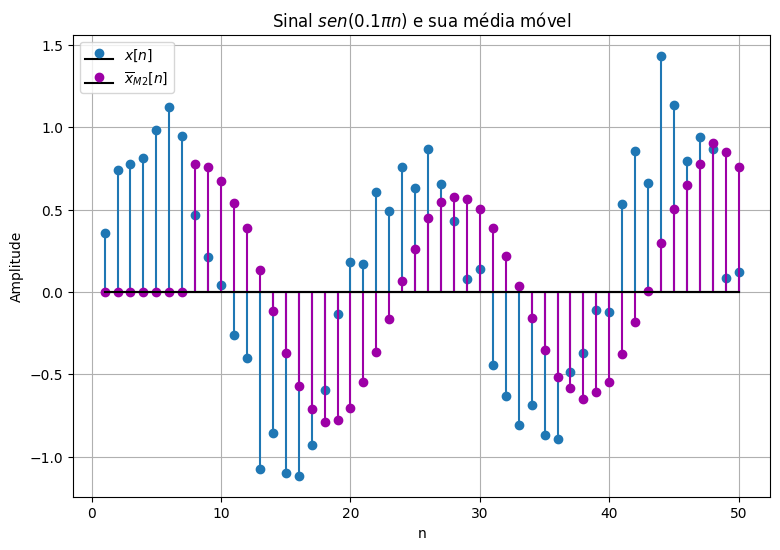

In [252]:
#Média móvel
def mediaMovel(signal:list[float], samples:list[int], m2:int)->list[float]:

    filteredSignal = []
    for n in samples:
        if n < m2:
            filteredSignal.append(0)
        else:
            mean = np.mean(signal[n - m2: n])
            filteredSignal.append(mean)

    return filteredSignal


xFiltered = mediaMovel(x_n, n_samples, 8)

plt.figure(figsize=(9,6))
plt.stem(n_samples, x_n, basefmt="k", label="$x[n]$")
plt.stem(n_samples, xFiltered, basefmt="k", linefmt="#9d00a6", label=r"$\overline{x}_{M2}[n]$")

#Estilização
plt.title("Sinal $sen(0.1\\pi n)$ e sua média móvel")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True)

plt.legend()
plt.show()

